### Import Necessary Modules and Load Json File

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
import json
from pandas.io.json import json_normalize

In [3]:
file='ultimate_data_challenge.json'
abc=json.load((open(file)))
abc


# Load Json and normalize into a DF, with required columns

df1=pd.DataFrame(json_normalize(abc))

### EDA

In [4]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
file='logins.json'
abc=json.load((open(file)))

df2=pd.DataFrame(json_normalize(abc,'login_time'))

In [6]:
df2.rename(columns={0:'login_time'},inplace=True)

In [7]:
df2.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [8]:
df1.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [9]:
df2.describe()

,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3


In [10]:
df2.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


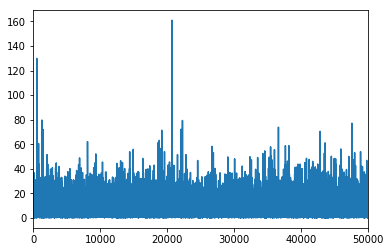

In [14]:
df1.avg_dist.plot()

## Data Cleaning and Manipulation

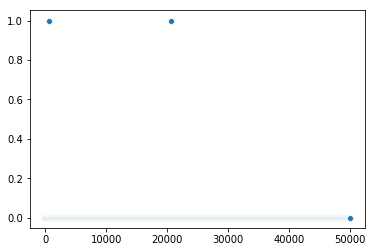

In [15]:
import seaborn as sns
sns.scatterplot(data=df1.avg_dist>90)

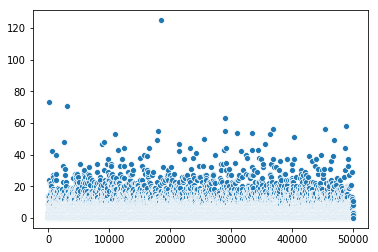

In [16]:
import seaborn as sns
sns.scatterplot(data=df1.trips_in_first_30_days)

In [17]:
df1=df1[df1.avg_dist<60]

In [18]:
df1=df1[df1.trips_in_first_30_days<60]

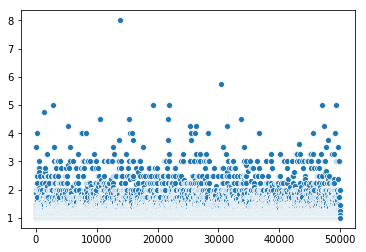

In [19]:
sns.scatterplot(data=df1.avg_surge)

In [20]:
df1=df1[df1.avg_surge<5]

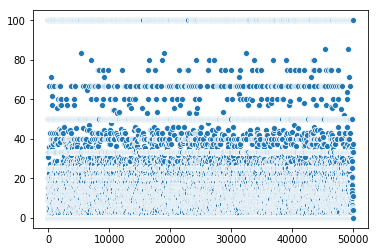

In [21]:
sns.scatterplot(data=df1.surge_pct)

In [22]:
df1=df1[df1.surge_pct<90]

In [23]:
df1=df1[df1.phone!='unknown']

In [24]:
df2.login_time=pd.to_datetime(df2.login_time)

In [25]:
time=df2.iloc[0]

In [26]:
time

login_time   1970-01-01 20:13:18
Name: 0, dtype: datetime64[ns]

In [27]:
df1.last_trip_date=pd.to_datetime(df1.last_trip_date)
df1.signup_date=pd.to_datetime(df1.signup_date)

In [28]:
def  daysElapsed (row,date=(2012,1,1)):
    
    return (row.time_stamp-pd.datetime(date[0],date[1],date[2])).days


def  weeksElapsed (row,date=(2012,1,1)):
    
    weeks=0
    
    days = daysElapsed (row)
    
    if days % 7 == 0:
        
        weeks = days // 7
    else:
        
        weeks = (days // 7) + 1
    
    return weeks

In [29]:
def  hour (row):
    
    return (row.login_time).hour

hour=df2.apply (lambda row: hour(row),axis=1) 


In [30]:
def  minutes (row):
    
    q_hours=0
    
    minutes = (row.login_time).minute
    
    if minutes % 15 == 0:
        
        q_hours = minutes // 15
    else:
        
        q_hours = (minutes // 15) + 1
    
    return q_hours

q_hours=df2.apply (lambda row: minutes(row),axis=1) 

In [31]:
def  last_trip_month (row):
    
    return (row.last_trip_date).month

last_trip_month=df1.apply (lambda row: last_trip_month(row),axis=1) 

In [32]:
last_trip_month.max()

7

In [33]:
def  signup_month (row):
    
    return (row.signup_date).month

signup_month=df1.apply (lambda row: signup_month(row),axis=1) 

In [34]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [35]:
df2['hours']=hour
df2['q_hours']=q_hours

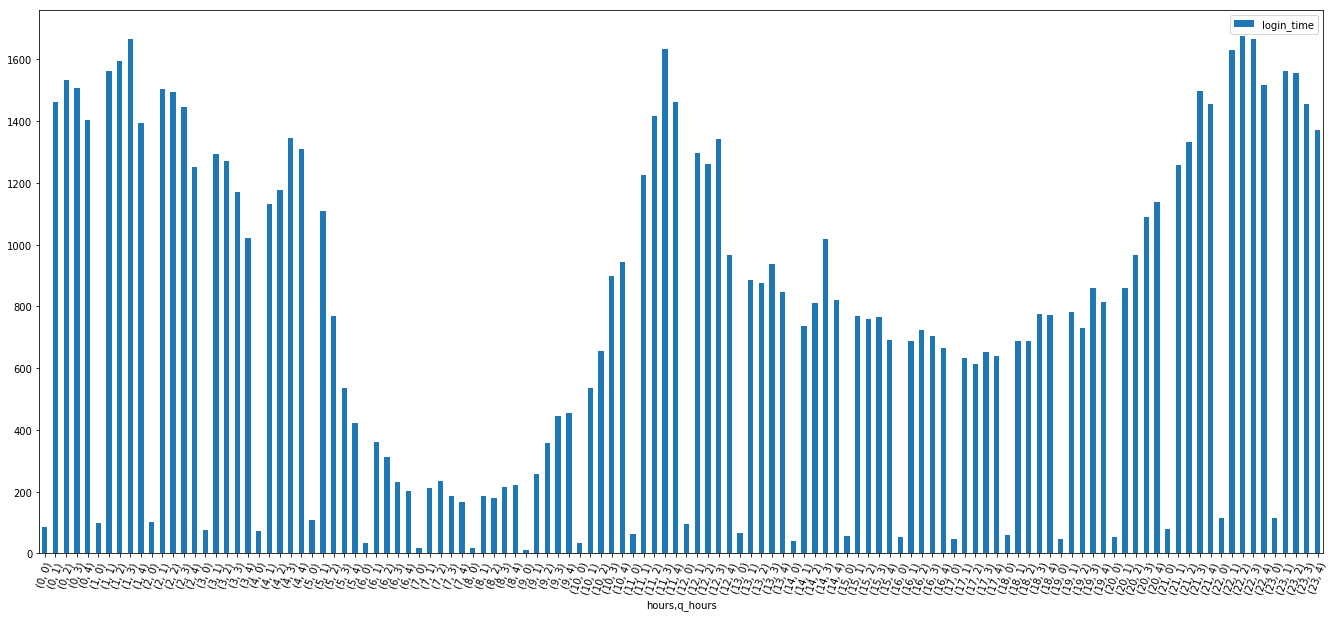

In [36]:
import matplotlib.pyplot as plt
df2.groupby(['hours','q_hours']).count().plot(kind='bar',rot=70,figsize=(23,10))

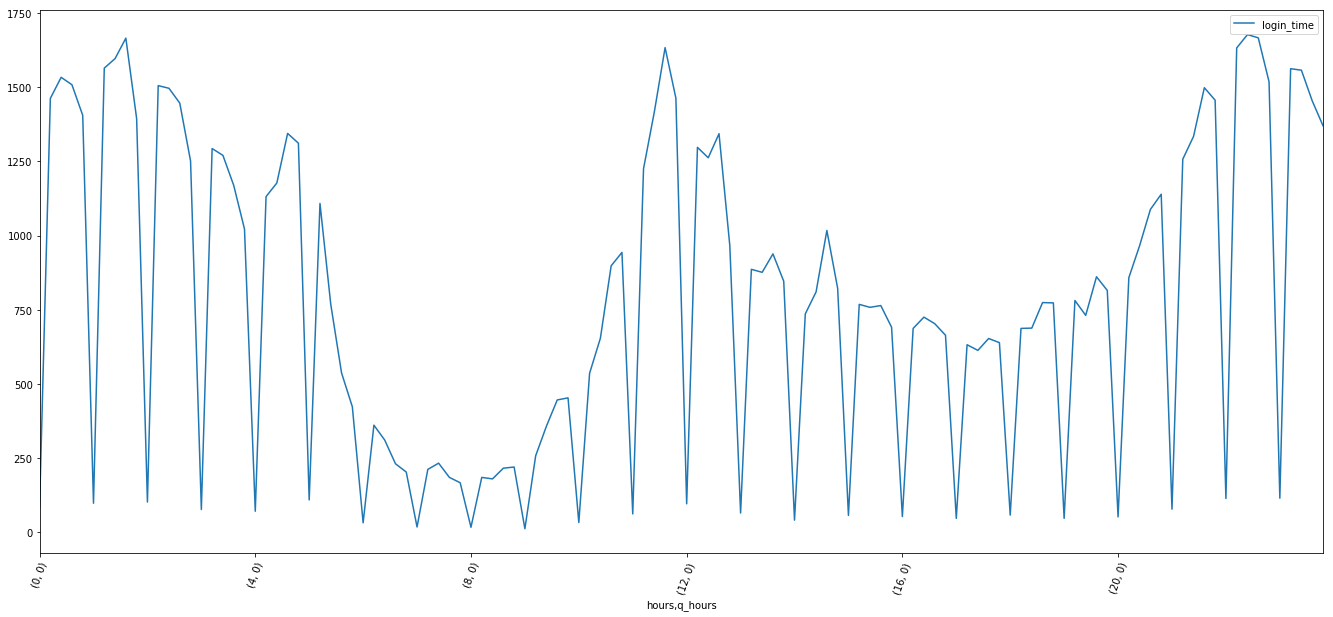

In [37]:
df2.groupby(['hours','q_hours']).count().plot(rot=70,figsize=(23,10))

## Data problems:
It is quite apparent that there is a problem with data. Every hour, first quarter of the data is looking suspicous. Riders distribution of login times (as a parameter of hour,minute) should have been evenly distributed. While an assertion about busy hours (rush hours, friday night etc) is acceptable, the low points at each first quarter of the hour is inexplicable.

## Feature Engineering

In [38]:
df1.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [39]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [40]:
date_crawled=df1.last_trip_date.max()
date_crawled

Timestamp('2014-07-01 00:00:00')

In [41]:
import datetime
check_days=date_crawled-datetime.timedelta(days=30)

In [42]:
df1[df1.last_trip_date>check_days].count()

avg_dist                  18097
avg_rating_by_driver      18071
avg_rating_of_driver      16630
avg_surge                 18097
city                      18097
last_trip_date            18097
phone                     17968
signup_date               18097
surge_pct                 18097
trips_in_first_30_days    18097
ultimate_black_user       18097
weekday_pct               18097
dtype: int64

In [43]:
def  daysElapsed (row,date=date_crawled):
    
    return (date_crawled - row.signup_date).days

days_till_signup=df1.apply (lambda row: daysElapsed(row),axis=1) 

In [44]:
def  daysElapsed_last_ride (row,date=date_crawled):
    
    return (date_crawled - row.last_trip_date).days

days_till_last_ride=df1.apply (lambda row: daysElapsed_last_ride(row),axis=1) 

In [45]:
def  days_between_dates (row):
    
    return (row.last_trip_date - row.signup_date).days

days_between_dates=df1.apply (lambda row: days_between_dates(row),axis=1) 

In [46]:
days_between_dates[:10]

0    143
1     96
2      1
3    170
4     47
5    148
6      1
7      1
8     11
9      2
dtype: int64

In [47]:
# pandas takes string and interprets it as datetime object...
#is_retained=(df1.last_trip_date>'2014-06-01').astype(int)

is_retained=(df1.last_trip_date>check_days).astype(int)


## Retain Rate

In [114]:
retainRate=np.round(df1.is_retained[df1.is_retained==1].count()/len(df1),2)
print ('Retain rate is {} %'.format(retainRate*100))

Retain rate is 37.0 %


In [48]:
df1['days_till_signup']=days_till_signup
df1['days_till_last_ride']=days_till_last_ride

In [49]:
df1['is_retained']=is_retained

In [50]:
df1['days_between_dates']=days_between_dates

In [51]:
df1.avg_rating_of_driver.fillna(value=round(df1.avg_rating_of_driver.mean(),2),inplace=True)

In [52]:
df1.avg_rating_by_driver.fillna(value=round(df1.avg_rating_by_driver.mean(),2),inplace=True)

In [53]:
df1.phone.fillna(value='unknown',inplace=True)

In [54]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,days_till_signup,days_till_last_ride,is_retained,days_between_dates
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,157,14,1,143
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,153,57,0,96
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,176,175,0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,172,2,1,170
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,155,108,0,47


In [55]:
df1.days_till_signup.max()

181

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48565 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  48565 non-null float64
avg_rating_by_driver      48565 non-null float64
avg_rating_of_driver      48565 non-null float64
avg_surge                 48565 non-null float64
city                      48565 non-null object
last_trip_date            48565 non-null datetime64[ns]
phone                     48565 non-null object
signup_date               48565 non-null datetime64[ns]
surge_pct                 48565 non-null float64
trips_in_first_30_days    48565 non-null int64
ultimate_black_user       48565 non-null bool
weekday_pct               48565 non-null float64
days_till_signup          48565 non-null int64
days_till_last_ride       48565 non-null int64
is_retained               48565 non-null int32
days_between_dates        48565 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int32(1), int64(4), object(2)
memory usage: 5.8+ MB


In [57]:
dict_city_mean=(df1.groupby('city').trips_in_first_30_days.mean().round(2)).to_dict()
df1['city_mean']=df1.city.map(dict_city_mean)

dict_city_dist=(df1.groupby('city').avg_dist.mean().round(5)).to_dict()
city_dist_by_cust=df1.city.map(dict_city_dist)*df1.avg_dist
df1['city_dist_by_cust']=city_dist_by_cust


def avg_rate_dummy(row):
    
    rider = 0
    
    driver = 0
    
    if row.avg_rating_by_driver == 5.0:
    
        rider = 1
    
    if row.avg_rating_of_driver == 5.0:
        
        driver = 1
        
    return rider,driver

perfects=df1.apply (lambda row: avg_rate_dummy(row),axis=1) 
df1['perfect_riders']=[num[0] for num in perfects]
df1['perfect_drivers']=[num[1] for num in perfects]
df1['weekday_surge']=df1.weekday_pct*df1.surge_pct
dict_avg_surge_city=(df1.groupby('city').avg_surge.mean().round(2)).to_dict()
df1['avg_surge_cust_over_city']=df1.avg_surge/df1.city.map(dict_avg_surge_city)
df1['signup_day']=df1.apply (lambda row:row.signup_date.weekday(),axis=1) 

In [58]:
features=list(df1.columns)
#features.remove([['is_retained','last_trip_date','signup_date']])
remove=['is_retained','last_trip_date','signup_date','days_till_last_ride','days_between_dates']#,'avg_rating_by_driver','avg_rating_of_driver'
#features.remove('is_retained')


In [59]:
features.remove(remove[0])
features.remove(remove[1])
features.remove(remove[2])
features.remove(remove[3])
features.remove(remove[4])

In [60]:
features

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'phone',
 'surge_pct',
 'trips_in_first_30_days',
 'ultimate_black_user',
 'weekday_pct',
 'days_till_signup',
 'city_mean',
 'city_dist_by_cust',
 'perfect_riders',
 'perfect_drivers',
 'weekday_surge',
 'avg_surge_cust_over_city',
 'signup_day']

In [61]:
labels=df1.is_retained


In [62]:
import numpy as np
from sklearn.utils import class_weight

 
class_weight1 =class_weight.compute_class_weight('balanced',np.unique(labels),labels)
weight=pd.DataFrame(class_weight1)
weight1=weight.to_dict()

weight=weight1[0]
weight

{0: 0.796983720624918, 1: 1.3417969829253467}

In [63]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df1[features], labels, test_size=0.3, random_state=42)

In [64]:
df4=df1.copy(deep=True)
city_dummies=pd.get_dummies(df4.city, prefix='city').iloc[:,1:]
phone_dummies=pd.get_dummies(df4.phone, prefix='phone').iloc[:,1:]
ultimate_black_dummies=pd.get_dummies(df4.ultimate_black_user, prefix='ultimate_black_user').iloc[:,1:]
df4=pd.concat([df4,city_dummies,phone_dummies,ultimate_black_dummies], axis=1)

In [65]:
features_dum=list(df4.columns)
features_dum

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'last_trip_date',
 'phone',
 'signup_date',
 'surge_pct',
 'trips_in_first_30_days',
 'ultimate_black_user',
 'weekday_pct',
 'days_till_signup',
 'days_till_last_ride',
 'is_retained',
 'days_between_dates',
 'city_mean',
 'city_dist_by_cust',
 'perfect_riders',
 'perfect_drivers',
 'weekday_surge',
 'avg_surge_cust_over_city',
 'signup_day',
 "city_King's Landing",
 'city_Winterfell',
 'phone_iPhone',
 'phone_unknown',
 'ultimate_black_user_True']

In [66]:
remove=['is_retained','last_trip_date','signup_date','days_till_last_ride','city','phone','ultimate_black_user','days_between_dates']
features_dum.remove(remove[0])
features_dum.remove(remove[1])
features_dum.remove(remove[2])
features_dum.remove(remove[3])
features_dum.remove(remove[4])
features_dum.remove(remove[5])
features_dum.remove(remove[6])
features_dum.remove(remove[7])

In [67]:
len(features_dum)

20

In [69]:
df4.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,perfect_riders,perfect_drivers,weekday_surge,avg_surge_cust_over_city,signup_day,city_King's Landing,city_Winterfell,phone_iPhone,phone_unknown,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,1,0,711.48,1.037736,5,1,0,1,0,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,1,1,0.00,0.943396,2,0,0,0,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,1,0,0.00,0.943396,0,0,0,1,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,0,0,1600.00,1.075472,4,1,0,1,0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,0,0,972.32,1.144231,0,0,1,0,0,0


## Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system.

In [70]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df4[features_dum], labels, test_size=0.3, random_state=42)

## Random Forest Classifier

In [71]:
rfc=RandomForestClassifier(random_state=42,n_jobs=-1,class_weight=weight)

params_rf = {'n_estimators':[20,30,40],
               'min_samples_leaf':[2,3], 'min_samples_split':[2,3],
            'min_weight_fraction_leaf':[0.0,0.1],'min_impurity_decrease':[0.0,0.1,0.2]       
                }


# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rfc,
                       param_grid=params_rf,
                       cv=5,
                       verbose=1,
                       n_jobs=-1)


grid_rf.fit(X_train1, y_train1) 

# Extract the best estimator
best_model_rf = grid_rf.best_estimator_

# Predict test set labels
rfc_pred = best_model_rf.predict(X_test1)

# Compute rmse_test
#rmse_test = MSE(ytest,ypred)**(0.5)

# Print rmse_test
#print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Best score: {:.3f}'.format(grid_rf.best_score_)) 


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   16.0s finished


Best score: 0.778


In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(rfc_pred,y_test1)

0.7668909981411607

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(rfc_pred,y_test1)

array([[7552, 1619],
       [1564, 3835]], dtype=int64)

In [74]:
lr=LogisticRegression(class_weight=weight,max_iter=1000)



C=[0.05,0.1]
params_lr = {'C':C, 'penalty': ['l1'],
                'tol': [1e-10], 'solver': ['liblinear']
                #, 'learning_rate':[0.15,0.2,0.25], 'depth':[4,6,8,10,12],'l2_leaf_reg':[0.005,0.1,0.2]
            }


# Instantiate grid_rf
grid_lr = GridSearchCV(estimator=lr,
                       param_grid=params_lr,scoring='neg_log_loss',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)


grid_lr.fit(X_train1, y_train1) 

# Extract the best estimator
best_model_lr = grid_lr.best_estimator_

# Predict test set labels
ypred = best_model_lr.predict(X_test1)

# Compute rmse_test
#rmse_test = MSE(ytest,ypred)**(0.5)

# Print rmse_test
#print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 
print('Best score: {:.3f}'.format(grid_lr.best_score_)) 


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  7.3min finished


Best score: -0.528


In [76]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix


In [79]:
roc_auc_score(ypred,y_test)
accuracy_score(ypred,y_test)

0.7447494852436514

In [80]:
list(enumerate(features))

[(0, 'avg_dist'),
 (1, 'avg_rating_by_driver'),
 (2, 'avg_rating_of_driver'),
 (3, 'avg_surge'),
 (4, 'city'),
 (5, 'phone'),
 (6, 'surge_pct'),
 (7, 'trips_in_first_30_days'),
 (8, 'ultimate_black_user'),
 (9, 'weekday_pct'),
 (10, 'days_till_signup'),
 (11, 'city_mean'),
 (12, 'city_dist_by_cust'),
 (13, 'perfect_riders'),
 (14, 'perfect_drivers'),
 (15, 'weekday_surge'),
 (16, 'avg_surge_cust_over_city'),
 (17, 'signup_day')]

In [81]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,days_till_last_ride,is_retained,days_between_dates,city_mean,city_dist_by_cust,perfect_riders,perfect_drivers,weekday_surge,avg_surge_cust_over_city,signup_day
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,14,1,143,2.50,21.959518,1,0,711.48,1.037736,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,57,0,96,1.99,44.714354,1,1,0.00,0.943396,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,175,0,1,1.99,4.168287,1,0,0.00,0.943396,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,2,1,170,2.50,14.121107,0,0,1600.00,1.075472,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,108,0,47,2.47,18.730170,0,0,972.32,1.144231,0


In [82]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(class_weights=[0.79,1.37])

categorical_feature_indices = [4,5,8]
                  
params_cb = {'depth':[4],
          'iterations':[250],
          'learning_rate':[0.1], 
          'l2_leaf_reg':[5],
          'border_count':[20],
          'ctr_border_count':[50,5,10,20],
          'thread_count':[4  ]

            }#'n_estimators':[1,2,5,40,50],
              

# Instantiate grid_rf
grid_cb = GridSearchCV(estimator=cb,
                       param_grid=params_cb,
                       cv=2,
                       verbose=1,
                       n_jobs=-1)


grid_cb.fit(X_train, y_train,cat_features=categorical_feature_indices,eval_set = (X_test,y_test)) 

# Extract the best estimator
best_model_cb = grid_cb.best_estimator_

# Predict test set labels
ypred = best_model_cb.predict(X_test)

print('Best score: {:.3f}'.format(grid_cb.best_score_)) 




Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:   21.8s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   23.2s finished


0:	learn: 0.6654365	test: 0.6650044	best: 0.6650044 (0)	total: 84.8ms	remaining: 21.1s
1:	learn: 0.6406232	test: 0.6400940	best: 0.6400940 (1)	total: 117ms	remaining: 14.5s
2:	learn: 0.6211847	test: 0.6205714	best: 0.6205714 (2)	total: 149ms	remaining: 12.2s
3:	learn: 0.6037903	test: 0.6029615	best: 0.6029615 (3)	total: 181ms	remaining: 11.1s
4:	learn: 0.5899235	test: 0.5887572	best: 0.5887572 (4)	total: 212ms	remaining: 10.4s
5:	learn: 0.5793847	test: 0.5779153	best: 0.5779153 (5)	total: 242ms	remaining: 9.86s
6:	learn: 0.5676755	test: 0.5658589	best: 0.5658589 (6)	total: 273ms	remaining: 9.47s
7:	learn: 0.5591547	test: 0.5573130	best: 0.5573130 (7)	total: 303ms	remaining: 9.16s
8:	learn: 0.5519878	test: 0.5501695	best: 0.5501695 (8)	total: 330ms	remaining: 8.84s
9:	learn: 0.5448888	test: 0.5427394	best: 0.5427394 (9)	total: 361ms	remaining: 8.66s
10:	learn: 0.5392640	test: 0.5370770	best: 0.5370770 (10)	total: 393ms	remaining: 8.53s
11:	learn: 0.5341427	test: 0.5317760	best: 0.531776

101:	learn: 0.4758444	test: 0.4754456	best: 0.4754456 (101)	total: 3.03s	remaining: 4.4s
102:	learn: 0.4758234	test: 0.4754300	best: 0.4754300 (102)	total: 3.06s	remaining: 4.37s
103:	learn: 0.4758166	test: 0.4754335	best: 0.4754300 (102)	total: 3.08s	remaining: 4.32s
104:	learn: 0.4756086	test: 0.4753238	best: 0.4753238 (104)	total: 3.11s	remaining: 4.29s
105:	learn: 0.4753148	test: 0.4750640	best: 0.4750640 (105)	total: 3.13s	remaining: 4.26s
106:	learn: 0.4750378	test: 0.4748988	best: 0.4748988 (106)	total: 3.16s	remaining: 4.22s
107:	learn: 0.4748495	test: 0.4747611	best: 0.4747611 (107)	total: 3.19s	remaining: 4.19s
108:	learn: 0.4747330	test: 0.4746489	best: 0.4746489 (108)	total: 3.22s	remaining: 4.17s
109:	learn: 0.4744999	test: 0.4745593	best: 0.4745593 (109)	total: 3.25s	remaining: 4.14s
110:	learn: 0.4744947	test: 0.4745632	best: 0.4745593 (109)	total: 3.27s	remaining: 4.1s
111:	learn: 0.4744175	test: 0.4745135	best: 0.4745135 (111)	total: 3.3s	remaining: 4.07s
112:	learn: 0

198:	learn: 0.4683774	test: 0.4713329	best: 0.4713329 (198)	total: 5.81s	remaining: 1.49s
199:	learn: 0.4683726	test: 0.4713346	best: 0.4713329 (198)	total: 5.85s	remaining: 1.46s
200:	learn: 0.4683315	test: 0.4713442	best: 0.4713329 (198)	total: 5.88s	remaining: 1.43s
201:	learn: 0.4682380	test: 0.4712813	best: 0.4712813 (201)	total: 5.91s	remaining: 1.4s
202:	learn: 0.4682009	test: 0.4712567	best: 0.4712567 (202)	total: 5.94s	remaining: 1.38s
203:	learn: 0.4681810	test: 0.4712544	best: 0.4712544 (203)	total: 5.97s	remaining: 1.35s
204:	learn: 0.4681656	test: 0.4712286	best: 0.4712286 (204)	total: 6s	remaining: 1.32s
205:	learn: 0.4681653	test: 0.4712278	best: 0.4712278 (205)	total: 6.03s	remaining: 1.29s
206:	learn: 0.4681588	test: 0.4712206	best: 0.4712206 (206)	total: 6.06s	remaining: 1.26s
207:	learn: 0.4680640	test: 0.4711626	best: 0.4711626 (207)	total: 6.09s	remaining: 1.23s
208:	learn: 0.4680505	test: 0.4711703	best: 0.4711626 (207)	total: 6.12s	remaining: 1.2s
209:	learn: 0.4

In [83]:
best_model_cb.get_params()

{'loss_function': 'Logloss',
 'class_weights': [0.79, 1.37],
 'border_count': 20,
 'ctr_border_count': 50,
 'depth': 4,
 'iterations': 250,
 'l2_leaf_reg': 5,
 'learning_rate': 0.1,
 'thread_count': 4}

In [87]:
confusion_matrix(y_test,ypred)
accuracy_score(y_test,ypred)

0.7818805765271105

[Text(0, 0, 'weekday_pct'),
 Text(0, 0, 'city_mean'),
 Text(0, 0, 'avg_rating_by_driver'),
 Text(0, 0, 'phone'),
 Text(0, 0, 'perfect_riders'),
 Text(0, 0, 'trips_in_first_30_days'),
 Text(0, 0, 'weekday_surge'),
 Text(0, 0, 'ultimate_black_user'),
 Text(0, 0, 'surge_pct'),
 Text(0, 0, 'avg_dist'),
 Text(0, 0, 'avg_surge'),
 Text(0, 0, 'avg_rating_of_driver'),
 Text(0, 0, 'city_dist_by_cust'),
 Text(0, 0, 'city'),
 Text(0, 0, 'signup_day'),
 Text(0, 0, 'avg_surge_cust_over_city'),
 Text(0, 0, 'days_till_signup'),
 Text(0, 0, 'perfect_drivers')]

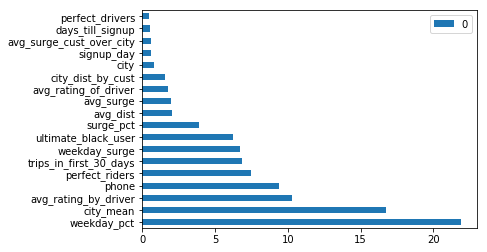

In [88]:
importance=pd.DataFrame(best_model_cb.get_feature_importance())
importance.index=features
sorted_imp=importance.sort_values(by=0,ascending=False)
index=sorted_imp.index
fig=sorted_imp.plot(kind='barh',logx=False)
fig.set_yticklabels(index, minor=False, rotation=0)

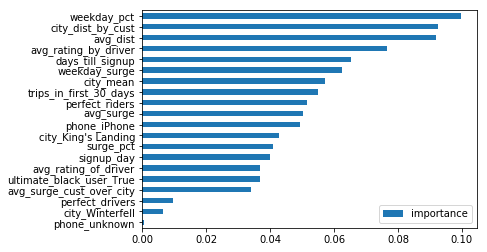

In [89]:
rf_feat=best_model_rf.feature_importances_
rf_df=pd.DataFrame(rf_feat,index=features_dum)#
rf_df.columns=['importance']
rf_df.sort_values(by='importance',inplace=True,ascending=True)
rf_df.plot(kind='barh',sort_columns=True)

In [90]:
rf_feat.size

20

In [105]:
#len(feat_dum)

In [92]:
import numpy as np
rounded=np.round(importance.values,1)

In [93]:
sorted_array=np.sort(rounded,axis=0)

In [94]:
(sorted_array)


array([[ 0.5],
       [ 0.6],
       [ 0.6],
       [ 0.6],
       [ 0.8],
       [ 1.6],
       [ 1.8],
       [ 2. ],
       [ 2.1],
       [ 3.9],
       [ 6.2],
       [ 6.8],
       [ 6.8],
       [ 7.5],
       [ 9.4],
       [10.3],
       [16.7],
       [21.9]])

In [95]:
np.arange(0,100,10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

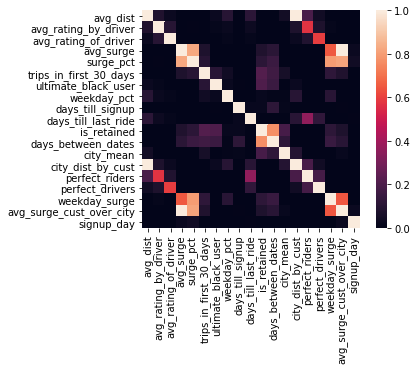

In [96]:
sns.heatmap(df1.corr(),square=True,vmin=0.00)


In [97]:
import seaborn as sns

In [98]:
a=df1.groupby('city').sum().is_retained

In [99]:
b=df1.groupby('city').count().is_retained

In [100]:
df1[df1.city=='Astapor'].count()

avg_dist                    15915
avg_rating_by_driver        15915
avg_rating_of_driver        15915
avg_surge                   15915
city                        15915
last_trip_date              15915
phone                       15915
signup_date                 15915
surge_pct                   15915
trips_in_first_30_days      15915
ultimate_black_user         15915
weekday_pct                 15915
days_till_signup            15915
days_till_last_ride         15915
is_retained                 15915
days_between_dates          15915
city_mean                   15915
city_dist_by_cust           15915
perfect_riders              15915
perfect_drivers             15915
weekday_surge               15915
avg_surge_cust_over_city    15915
signup_day                  15915
dtype: int64

In [101]:
df1[df1.city=='Astapor'].is_retained.sum()

3986

In [102]:
c=a/b

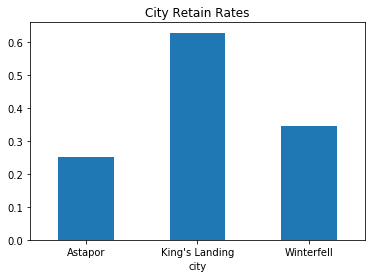

In [103]:
c.plot(kind='bar',rot=0, title='City Retain Rates')

In [104]:
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,days_till_last_ride,is_retained,days_between_dates,city_mean,city_dist_by_cust,perfect_riders,perfect_drivers,weekday_surge,avg_surge_cust_over_city,signup_day
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,14,1,143,2.50,21.959518,1,0,711.48,1.037736,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,57,0,96,1.99,44.714354,1,1,0.00,0.943396,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,175,0,1,1.99,4.168287,1,0,0.00,0.943396,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,2,1,170,2.50,14.121107,0,0,1600.00,1.075472,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,108,0,47,2.47,18.730170,0,0,972.32,1.144231,0


Retain rate is 37.0 %


In [115]:
df1.columns


Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'days_till_signup', 'days_till_last_ride', 'is_retained',
       'days_between_dates', 'city_mean', 'city_dist_by_cust',
       'perfect_riders', 'perfect_drivers', 'weekday_surge',
       'avg_surge_cust_over_city', 'signup_day'],
      dtype='object')

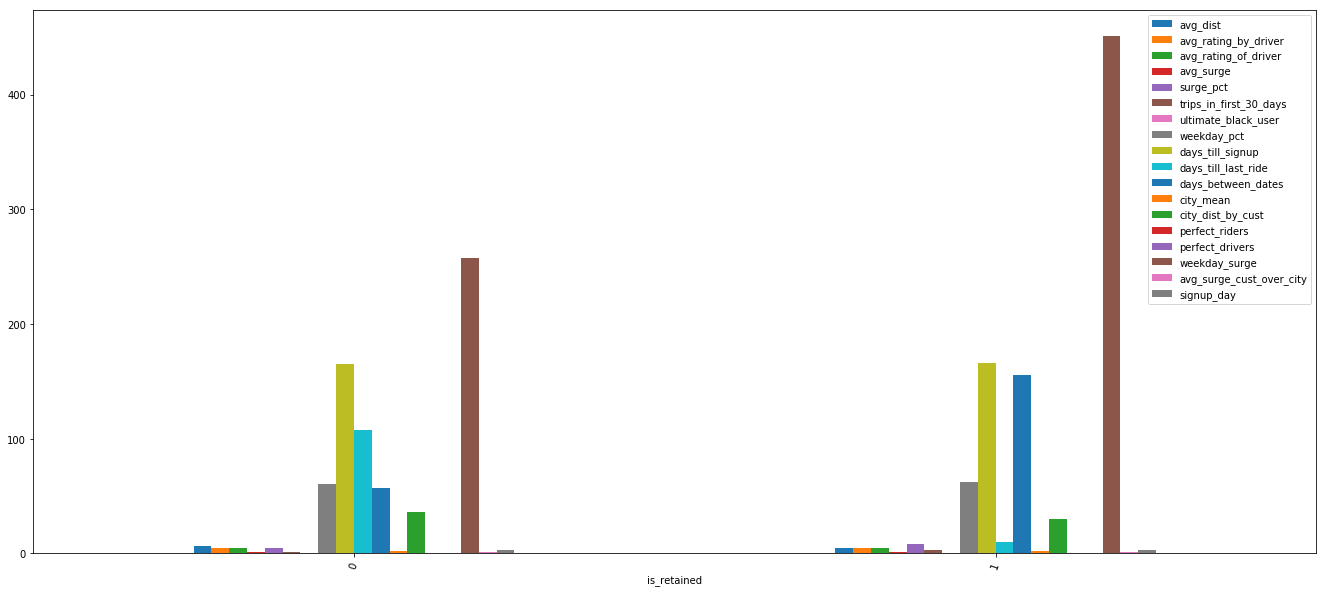

In [125]:
df1.groupby("is_retained").mean().plot(kind='bar',rot=70,figsize=(23,10))

In [126]:
df1.groupby("is_retained").mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,days_till_signup,days_till_last_ride,days_between_dates,city_mean,city_dist_by_cust,perfect_riders,perfect_drivers,weekday_surge,avg_surge_cust_over_city,signup_day
is_retained,,,,,,,,,,,,,,,,,,
0,6.207701,4.785662,4.606229,1.042009,5.062364,1.694696,0.309111,60.995641,165.318301,107.912269,57.406033,2.285693,35.856306,0.682158,0.460286,257.603104,0.992196,3.294112
1,5.105373,4.761434,4.593574,1.064137,8.101459,3.371056,0.513897,62.478582,165.698624,10.056363,155.642261,2.374606,30.005760,0.358291,0.338785,451.284438,1.012264,3.304470
